In [5]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# helper functions
def add_gaussian_noise(img, mean=0, std_dev=0.1):
    """ Adds gaussian noise to the given image 
    img : Image data with float values in range 0, 1
    mean : mean value of the noise being added
    std_dev : standard deviation of the noise being added
    """
    noise = np.random.normal(mean, std_dev, img.shape)
    noisy_img = np.clip(img + noise, 0, 1)
    return noisy_img

def add_salt_and_pepper_noise(img, amount):
    """ Adds salt and pepper noise to the given image
    img : Image data with float values in range 0, 1
    amount: probability of a noise being added
    """
    # for single channel image
    if len(img.shape) == 2:
        noisy_img = np.copy(img)
        # add pepper
        noise_location = np.random.random(noisy_img.shape) < (amount/2)
        noisy_img[noise_location] = 1.0
        # add salt
        noise_location = np.random.random(noisy_img.shape) < (amount/2)
        noisy_img[noise_location] = 0.0
        
        return noisy_img

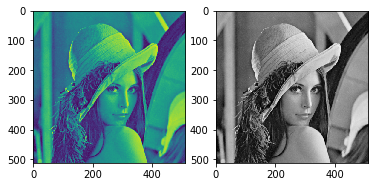

In [67]:
img = mpimg.imread('../img/lena_gray.png')
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(img, cmap='gray')